In [1]:
import fpmodules as fp
import pandas as pd
from fpmodules.tools.constants import EVENTS_CACHE_PATH
from fpmodules.fpio.raw_data import load_data_from_files
from fpmodules.tools.dbtools import to_pdatime
from fpmodules import BlobManager
import matplotlib.pyplot as plt
import fpmodules.tools as tools
import seaborn as sns

*** FP-modules version 2.10.13 ***


In [2]:
meas = fp.dbquery('select * from measurement where sessionid=686')

In [3]:
wbf = fp.get_features(sessionid=686, featureid=52)

In [4]:
insects = fp.get_insects(sessionid=686)

In [5]:
insects

,MeasurementId,ClassifierId,Classification,SegmentId,MeasurementCode,SessionId,UnitId,Datetime
0,35419285,31,1.00,4,a2e976d56196d800,686,18,2021-03-30 15:25:16
1,35419287,31,1.00,3,6db3965e8c788c00,686,18,2021-03-30 15:25:17
2,35419288,31,0.98,2,1162c897e2f06900,686,18,2021-03-30 15:25:24
3,35419289,31,1.00,3,5ba2d1aaa6777800,686,18,2021-03-30 15:24:18
4,35419290,31,1.00,3,3236fe5467109a00,686,18,2021-03-30 15:24:19
...,...,...,...,...,...,...,...,...
34680,42377708,31,1.00,4,e341cc3cd8a74000,686,18,2021-04-19 09:02:25
34681,42377709,31,1.00,4,106f372ecc90b900,686,18,2021-04-19 09:02:31
34682,42377710,31,1.00,4,e3e82aec2b018000,686,18,2021-04-19 09:04:12
34683,42378611,31,1.00,4,588c9ef50215bc00,686,18,2021-04-19 09:07:12


<AxesSubplot:title={'center':'35419296 | 2021-03-30 15:30:10'}>

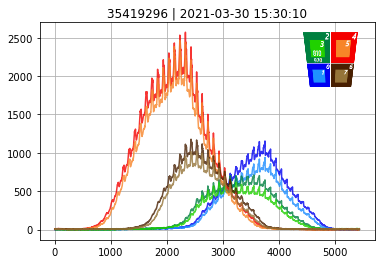

In [6]:
ev = fp.Event(35419296).fill()
ev.plot()

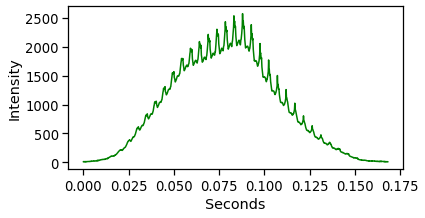

In [8]:
import seaborn as sns
import numpy as np
sns.set_context('notebook',font_scale=1.2)
plt.figure(figsize=(6,3))
time = np.linspace(0,len(ev.data[4,500:4000]),len(ev.data[4,500:4000]))
plt.plot(time/20800, ev.data[4,500:4000],c='g')
plt.gca().set_xlabel('Seconds')
plt.gca().set_ylabel('Intensity')
plt.savefig('/home/thoresen/Downloads/fig.png',dpi=200,bbox_inches='tight')
plt.show()

In [38]:
import numpy as np



array([0.00000000e+00, 4.80865404e-05, 9.61730808e-05, ...,
       2.40288442e-01, 2.40336529e-01, 2.40384615e-01])

In [5]:
len(wbf[wbf['MeasurementId'].isin(insects['MeasurementId'])])

272328

(150.0, 300.0)

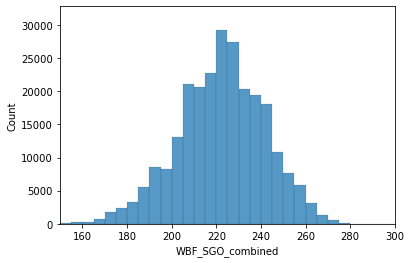

In [6]:
sns.histplot(wbf['WBF_SGO_combined'], binwidth=5)
plt.gca().set_xlim([150,300])

In [7]:
fp.check_raw_availability(unitid=66, startdateid=20211013, enddateid=20211018)

{'20211013': ['dca6324634b1/20211013/raw/20211013T000405Z.raw.gz',
  'dca6324634b1/20211013/raw/20211013T001703Z.raw.gz',
  'dca6324634b1/20211013/raw/20211013T002959Z.raw.gz',
  'dca6324634b1/20211013/raw/20211013T004244Z.raw.gz',
  'dca6324634b1/20211013/raw/20211013T010020Z.raw.gz',
  'dca6324634b1/20211013/raw/20211013T011308Z.raw.gz',
  'dca6324634b1/20211013/raw/20211013T012606Z.raw.gz',
  'dca6324634b1/20211013/raw/20211013T013911Z.raw.gz',
  'dca6324634b1/20211013/raw/20211013T015153Z.raw.gz',
  'dca6324634b1/20211013/raw/20211013T020408Z.raw.gz',
  'dca6324634b1/20211013/raw/20211013T021625Z.raw.gz',
  'dca6324634b1/20211013/raw/20211013T022912Z.raw.gz',
  'dca6324634b1/20211013/raw/20211013T024208Z.raw.gz',
  'dca6324634b1/20211013/raw/20211013T025455Z.raw.gz',
  'dca6324634b1/20211013/raw/20211013T030710Z.raw.gz',
  'dca6324634b1/20211013/raw/20211013T031946Z.raw.gz',
  'dca6324634b1/20211013/raw/20211013T033242Z.raw.gz',
  'dca6324634b1/20211013/raw/20211013T034536Z.raw.gz'

In [8]:
fp.get_session(sessionid=1307)
insects=fp.get_insects(sessionid=1307)
wbf = fp.get_features(sessionid=1307, featureid=[52,12])

(0.0, 300.0)

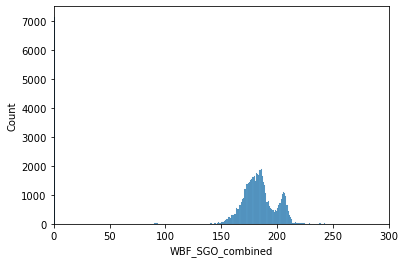

In [9]:
import seaborn as sns
sns.histplot(wbf['WBF_SGO_combined'])
plt.gca().set_xlim([0,300])

<AxesSubplot:xlabel='max', ylabel='Count'>

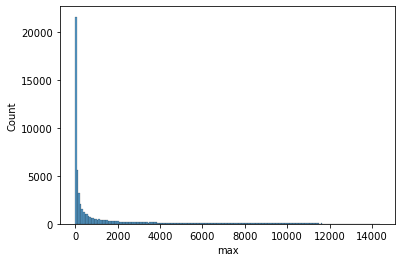

In [10]:
import seaborn as sns
sns.histplot(wbf['max'])
#plt.gca().set_xlim([0,300])

In [11]:
merge=pd.merge(wbf,insects,on=['MeasurementId','SegmentId'])

In [12]:
selection = (merge['WavelengthId'] == '810') & (merge['SegmentId']==4)

In [13]:
tools.get_instrument_info()

{'SRS': {'channels': [808, 975]},
 'Scout': {'channels': ['970C',
   '810C',
   '970B',
   '810B',
   '970A',
   '810A',
   '970D',
   '810D'],
  'cmap': ['#0000F1',
   '#1E90FF',
   '#008040',
   '#20D100',
   '#F40000',
   '#F78528',
   '#481F01',
   '#957439'],
  'legend_img_path': 'SCOUT colour scheme skew.png'}}

In [14]:
fp.dbquery('select * from segment')

,Id,UnitTypeId,Name,Description
0,0,7,,No Segment
1,1,7,C,Bottom left
2,2,7,B,Top left
3,3,7,A,Top right
4,4,7,D,Bottom right


In [15]:
_merge = merge[selection]

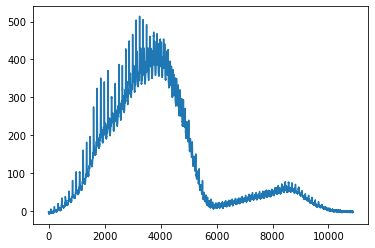

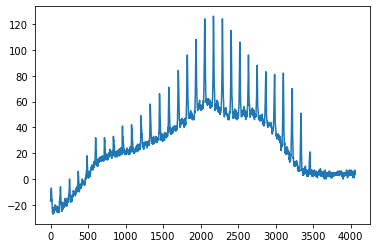

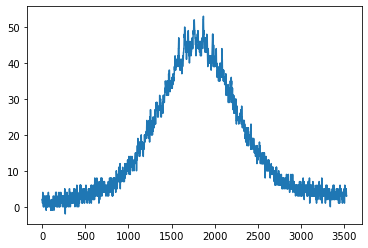

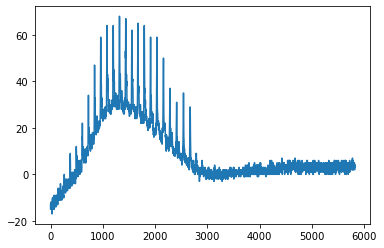

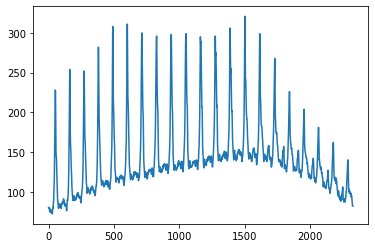

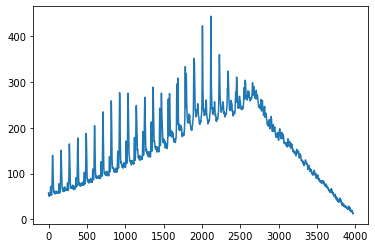

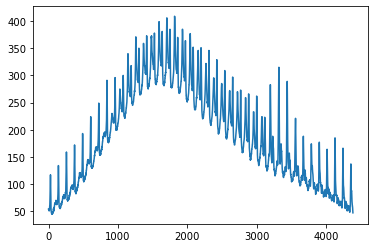

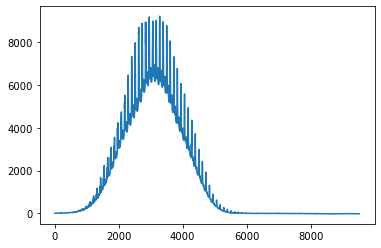

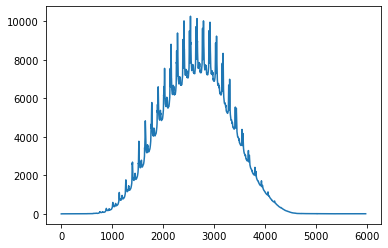

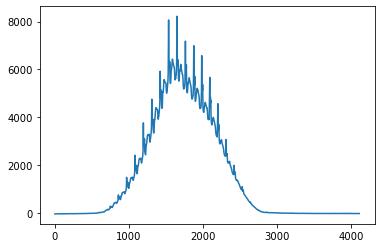

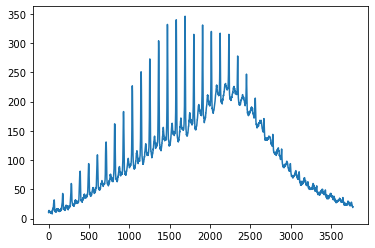

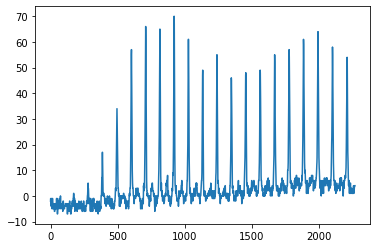

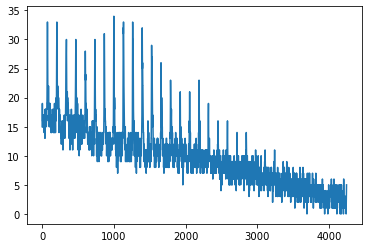

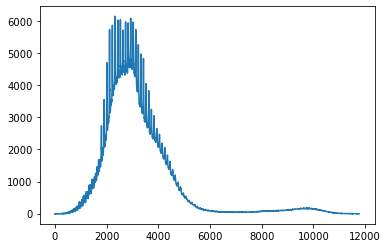

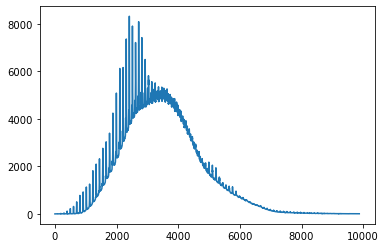

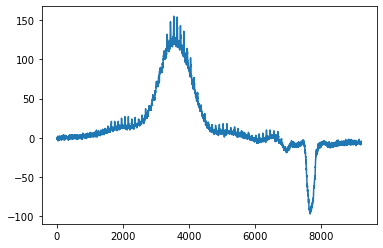

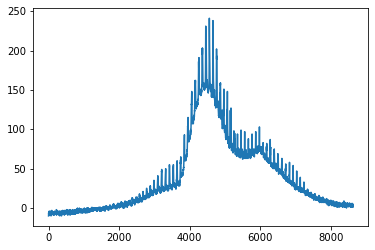

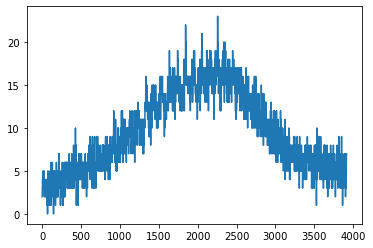

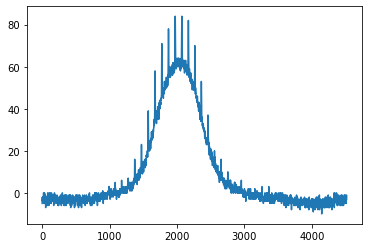

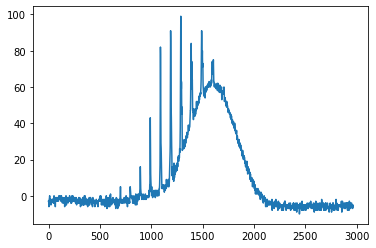

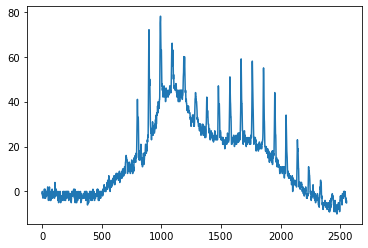

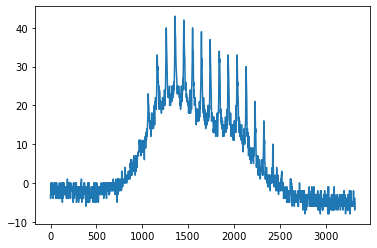

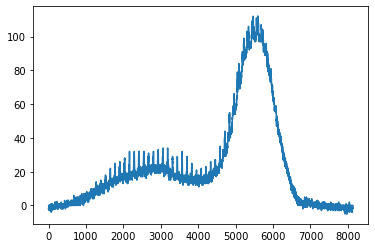

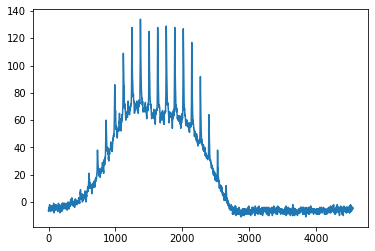

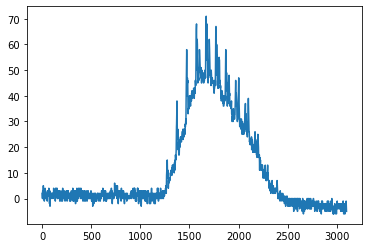

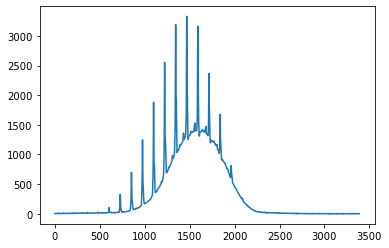

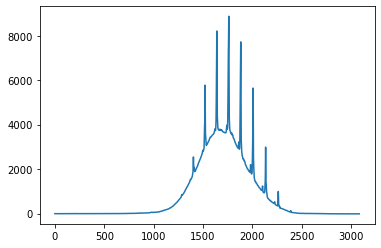

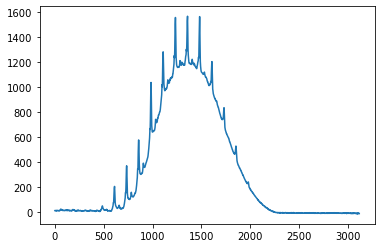

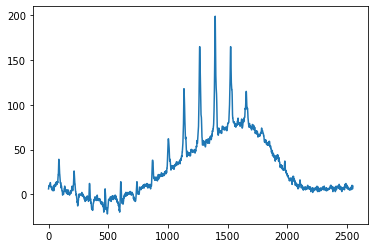

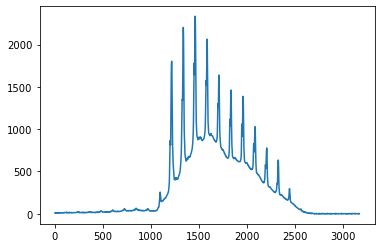

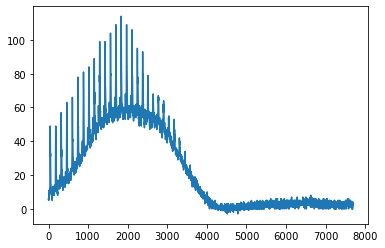

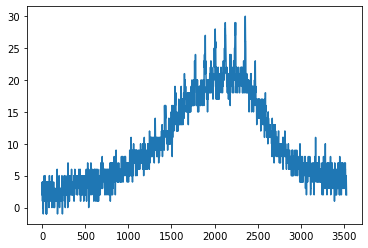

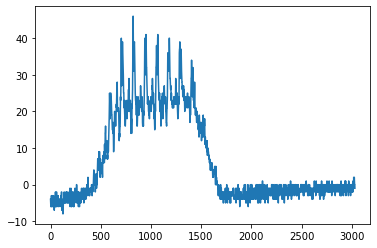

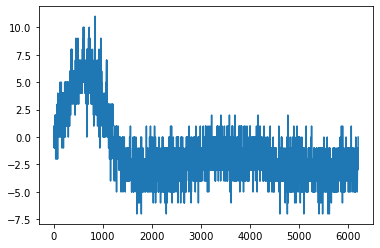

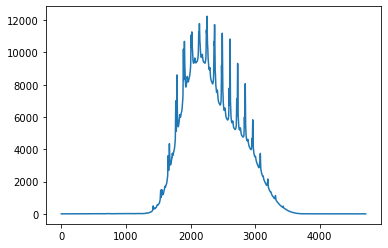

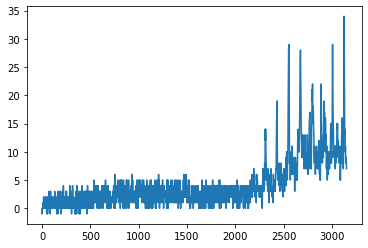

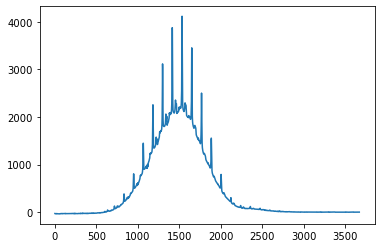

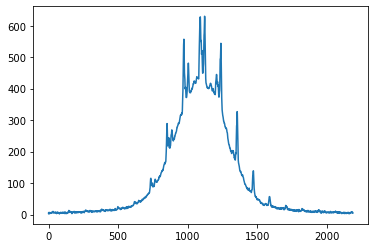

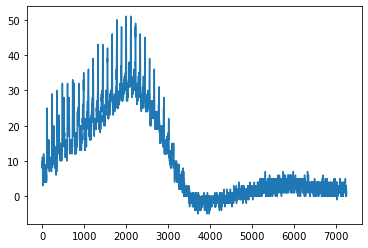

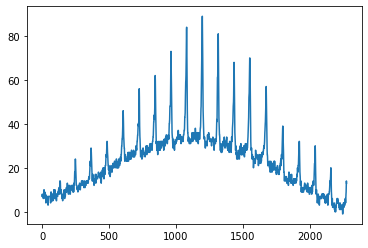

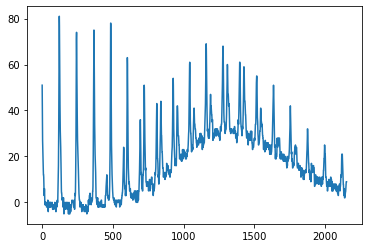

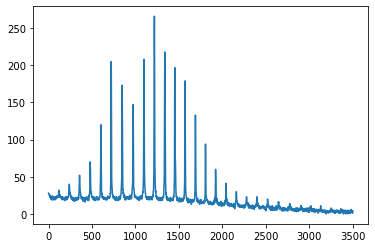

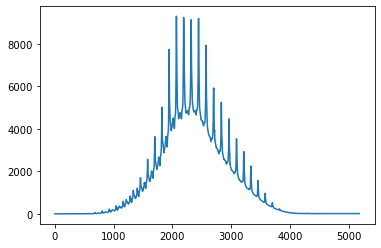

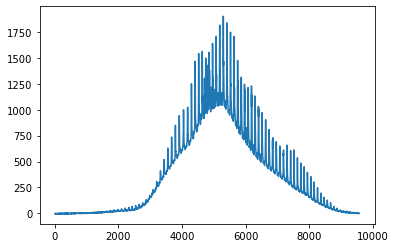

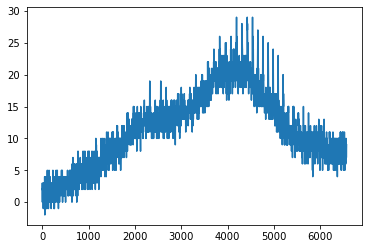

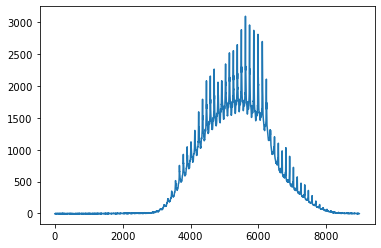

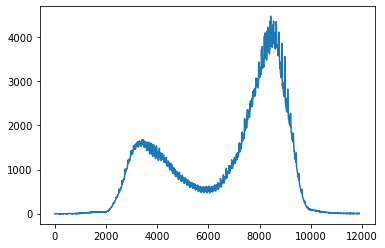

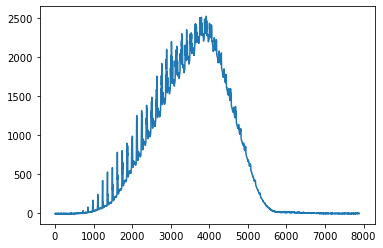

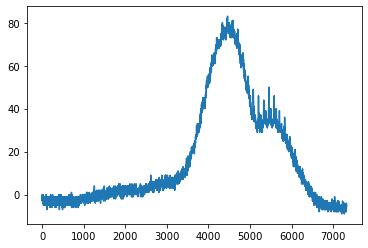

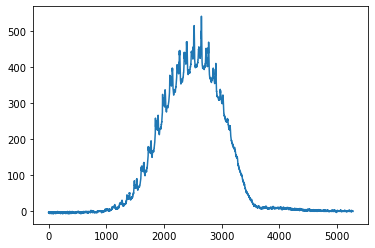

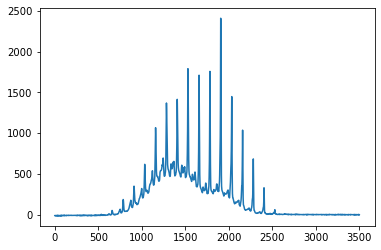

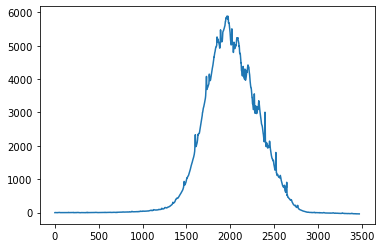

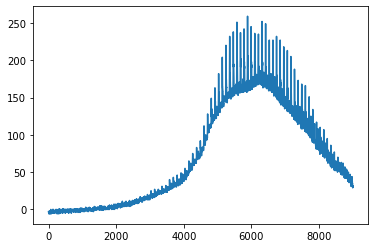

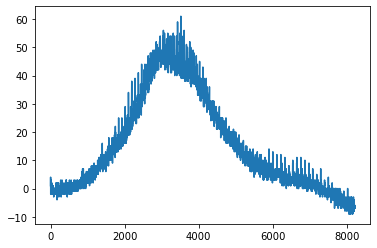

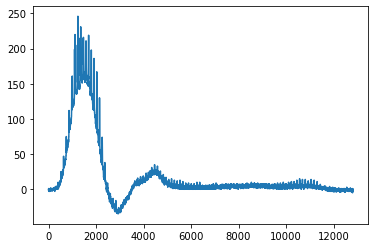

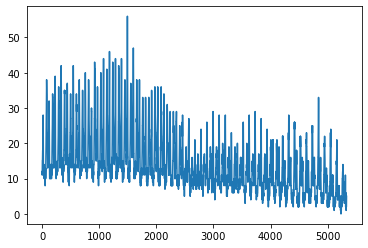

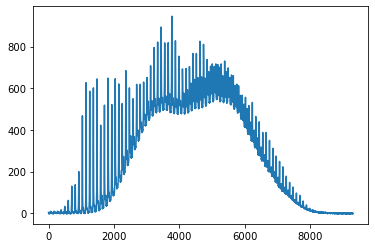

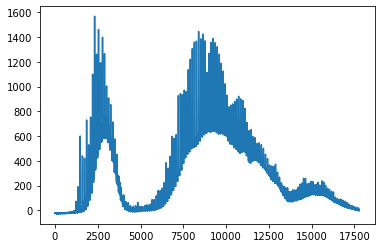

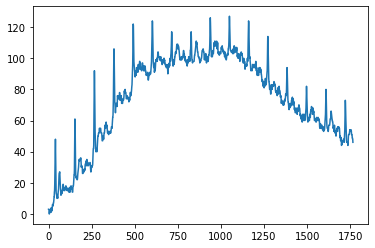

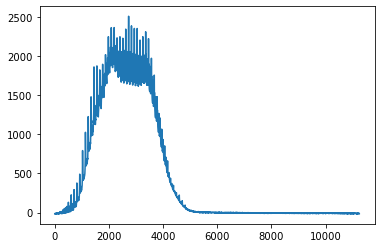

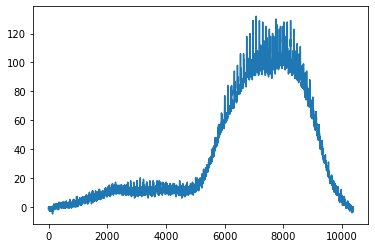

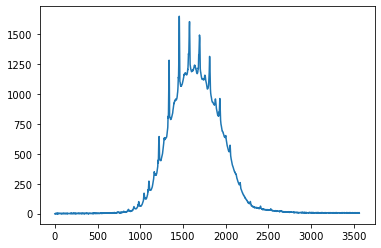

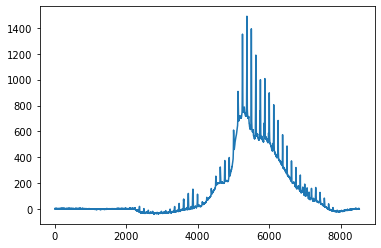

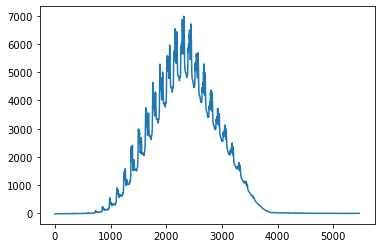

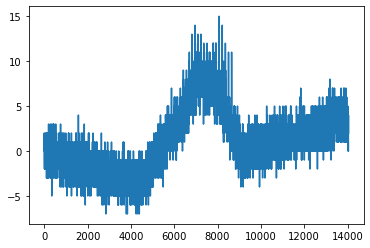

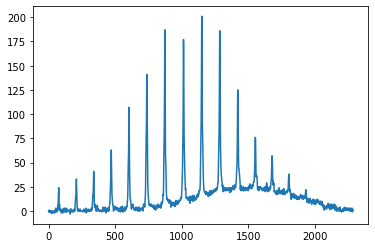

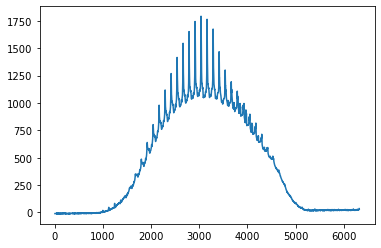

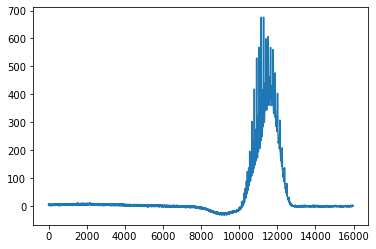

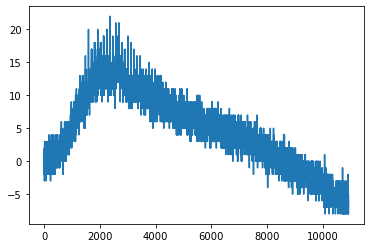

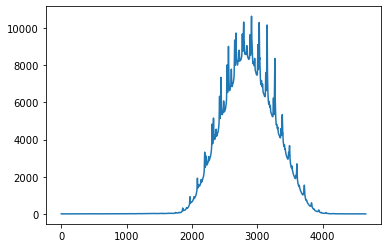

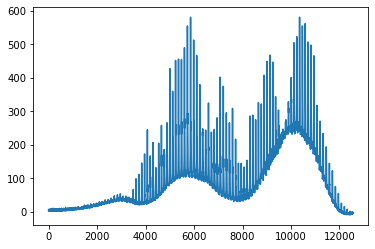

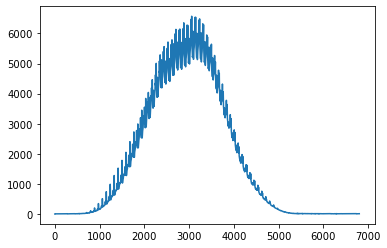

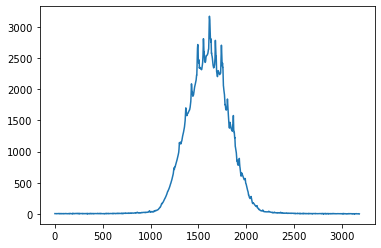

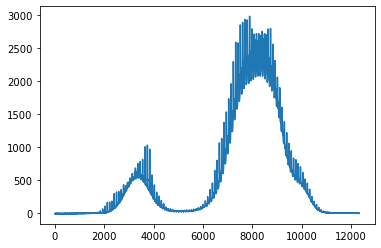

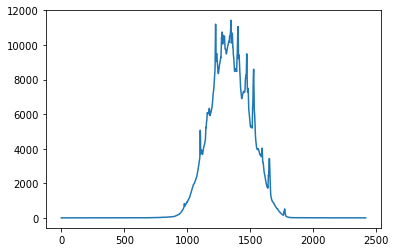

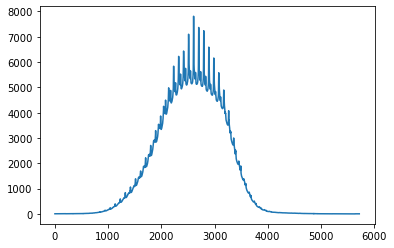

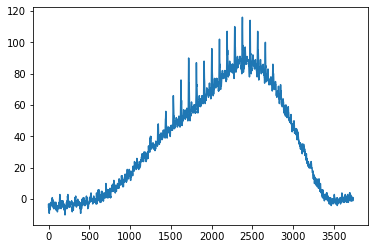

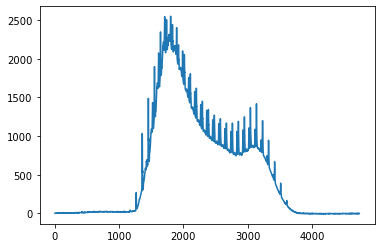

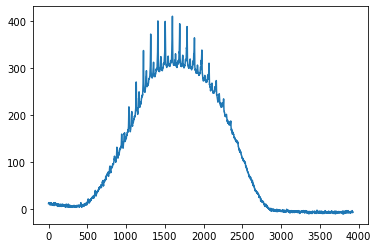

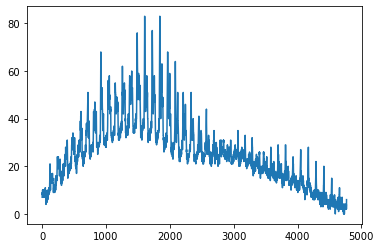

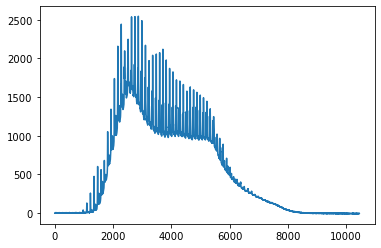

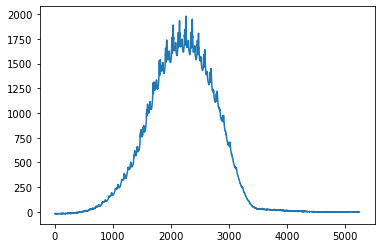

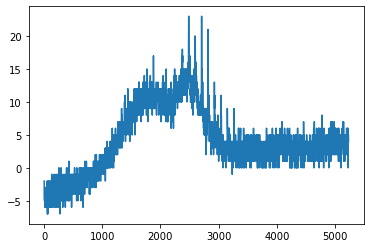

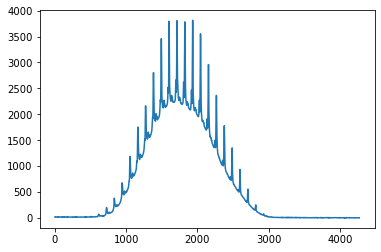

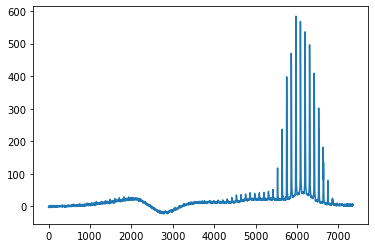

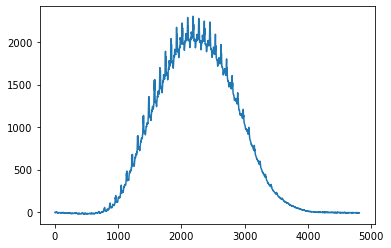

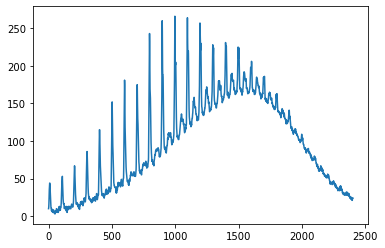

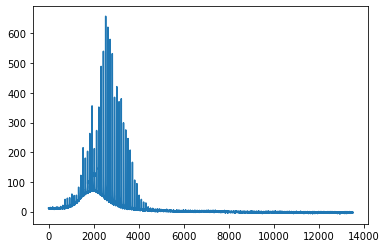

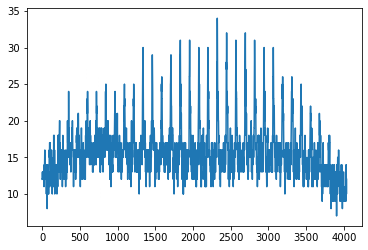

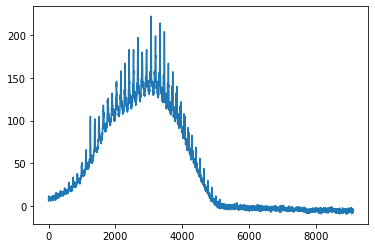

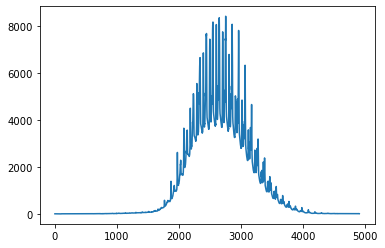

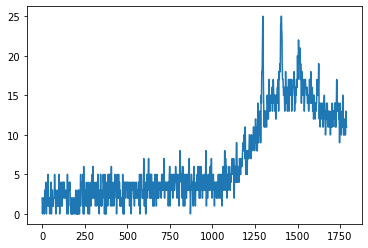

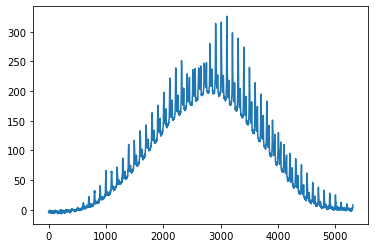

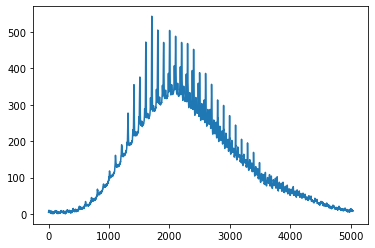

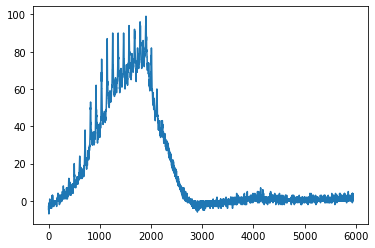

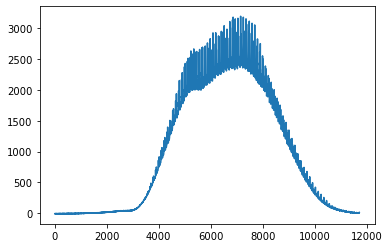

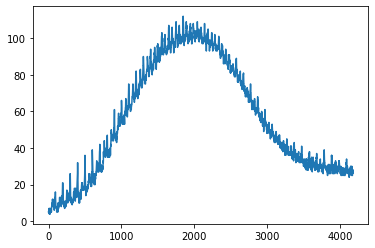

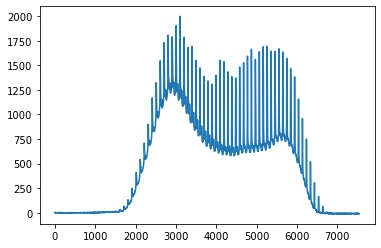

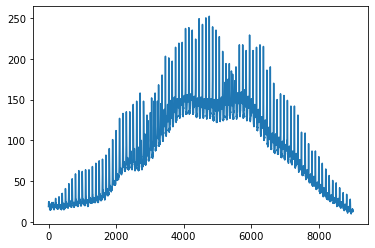

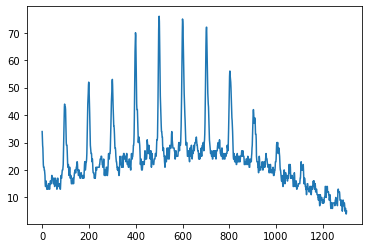

In [16]:
for m_id in _merge['MeasurementId'].unique().tolist()[0:100]:
    ev = fp.Event(m_id).fill()
    plt.plot(ev.data[7,:])
    plt.show()